In [19]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy.linalg import qr
from scipy import optimize
from scipy.optimize import minimize_scalar
import egrss 
import lambda_fun 
import os

def error(fun):
    def y(x):
        return 0.25*np.cos(4*np.pi *x) + 0.15*np.sin(12* np.pi *x) + 0.2 * x
    a,b = -0.2, 0.5
    N = 100
    p = 2
    xi = (b-a) ** (2 * p - 1) 
    x = np.linspace(a,b,N)
    yhat = y(x) + 0.1 * np.random.normal(loc = 0, scale = 1, size = N)
    # finding the minimizer
    min_point = fun(N= 100, x = x, p = 2, yhat = yhat, method = 'golden',  usage = 'min')

    lam = 1/np.power(10,min_point.x)
    Ut, Vt = egrss.generators((x-a)/(b-a),p)
    Wt, z  = egrss.potrf(Ut,Vt,N*lam/xi)
    c,d    = lambda_fun.smoothing_spline_reg(Ut,Wt,z,yhat)

    error = (y(x)-(yhat-N*lam/xi*c))**2
    error_sum = np.sqrt(sum(error))
    
    
    return error_sum, lam

errors = np.zeros([100,2])
lamb = np.zeros([100,2])

for i in range(100):
    errors[i,0] = error(lambda_fun.min_GML)[0]
    errors[i,1] = error(lambda_fun.min_GCV)[0]
    lamb[i,0] = error(lambda_fun.min_GML)[1]
    lamb[i,1] = error(lambda_fun.min_GCV)[1]

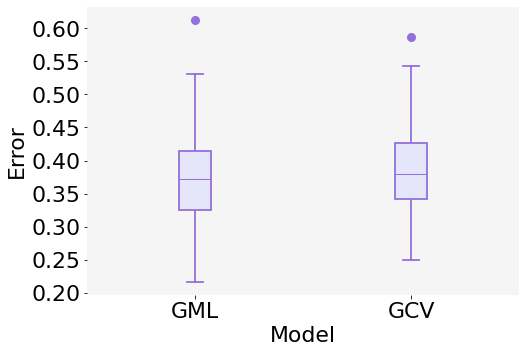

In [20]:
def plot_deg(y, xlabel, ylabel, savename):
    fig = plt.figure()
    ax = fig.add_axes([0, 0,  1, 1])
    c = 'lavender'
    d = 'mediumpurple'
    lw = 1.8
    bp = ax.boxplot(y, positions=[1,2], patch_artist=True,
            boxprops=dict(facecolor=c, color=d, linewidth = lw),
            capprops=dict(color=d, linewidth = lw),
            whiskerprops=dict(color=d , linewidth = lw),
            flierprops=dict(color=d, markeredgecolor=d, marker='o', markerfacecolor=d, markersize=8,linewidth = lw),
            medianprops=dict(color=d),
            )
    plt.xlabel(xlabel, fontsize = 22)
    plt.ylabel(ylabel, fontsize = 22)
    
    plt.yticks(fontsize = 22)
    plt.xticks([1,2], ['GML', 'GCV'], fontsize = 22)
    plt.tick_params(left=True, bottom = True, right = False, top = False)
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.show
    

    my_path = os.getcwd()
    fig.savefig(my_path + savename, bbox_inches='tight')
    
  
plot_deg(errors, xlabel = 'Model', ylabel = 'Error',savename = "/Plots/errors.pdf")


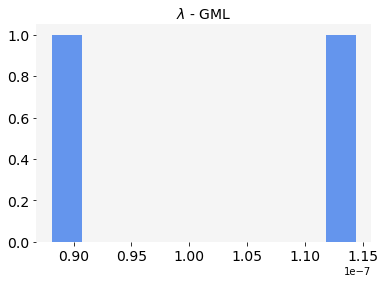

In [34]:
fig = plt.figure()
plt.hist(lamb[0,:], color = 'cornflowerblue')
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0,0))
plt.title('$\\lambda$ - GML', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax = plt.gca()
ax.set_facecolor('whitesmoke')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
my_path = os.getcwd()
fig.savefig(my_path + '/Plots/hist_lambdaGML.pdf', bbox_inches='tight')

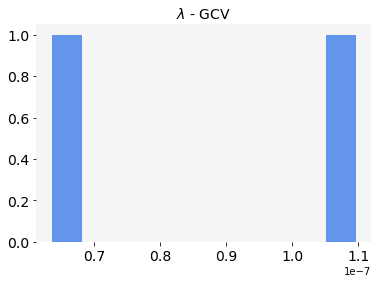

In [37]:
fig = plt.figure()
plt.hist(lamb[1,:], color = 'cornflowerblue')
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0,0))
plt.title('$\\lambda$ - GCV', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax = plt.gca()
ax.set_facecolor('whitesmoke')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
my_path = os.getcwd()
fig.savefig(my_path + '/Plots/hist_lambdaGCV.pdf', bbox_inches='tight')